DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100

ad_spend = np.random.normal(5000, 1500, size=n)
sales = 2000 + ad_spend * 0.6 + np.random.normal(0, 1000, size=n)  # some noise
season_index = np.random.choice([1, 2, 3], size=n, p=[0.5, 0.3, 0.2])  # represents low, mid, peak season

df = pd.DataFrame({
    'Week': pd.date_range(start="2022-01-01", periods=n, freq='W'),
    'Ad_Spend': ad_spend,
    'Sales': sales,
    'Season': season_index
})
df.to_csv("ad_vs_sales.csv", index=False)


## Tasks:
1. Compute correlation between Ad Spend and Sales (Pearson r).

2. Create a scatter plot with regression line.

3. Check whether Season might be a confounding variable.

4. Run a multiple regression: `Sales ~ Ad_Spend + Season`

5. Interpret:

    - Does Ad Spend still significantly impact Sales?
    - What role does Season play?

In [2]:
df.head()

,Week,Ad_Spend,Sales,Season
0,2022-01-02,5745.071230,4031.671996,3
1,2022-01-09,4792.603548,4454.916806,2
2,2022-01-16,5971.532807,5240.205168,2
3,2022-01-23,7284.544785,5568.449602,2
4,2022-01-30,4648.769938,4627.976251,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Week      100 non-null    datetime64[ns]
 1   Ad_Spend  100 non-null    float64       
 2   Sales     100 non-null    float64       
 3   Season    100 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.2 KB


In [24]:
df[['Ad_Spend','Sales', 'Season']].describe()

,Ad_Spend,Sales,Season
count,100.000000,100.000000,100.000000
mean,4844.230224,4928.842721,1.680000
std,1362.252642,1168.276750,0.708961
min,1070.382344,2315.875570,1.000000
25%,4098.641494,4064.550500,1.000000
50%,4809.565562,4902.147694,2.000000
75%,5608.928078,5581.335082,2.000000
max,7778.417277,8307.477435,3.000000


In [5]:
df[['Ad_Spend', 'Sales']].corr(method='pearson')

,Ad_Spend,Sales
Ad_Spend,1.00000,0.58826
Sales,0.58826,1.00000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

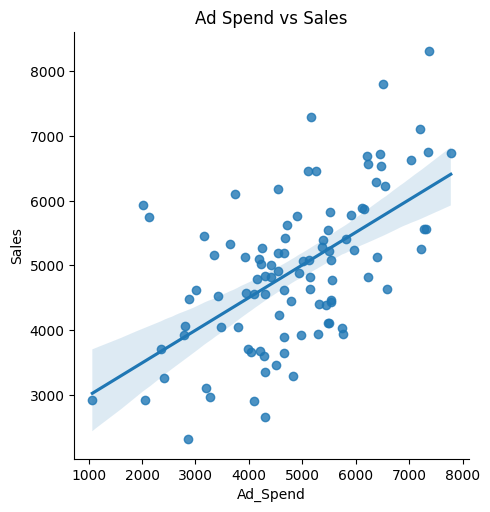

In [7]:
sns.lmplot(data=df, x='Ad_Spend', y='Sales')
plt.title('Ad Spend vs Sales')
plt.show()

In [8]:
import statsmodels.api as sm
X = pd.get_dummies(df[['Ad_Spend', 'Season']], drop_first=True)
y = df['Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     25.70
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.10e-09
Time:                        20:21:41   Log-Likelihood:                -826.46
No. Observations:                 100   AIC:                             1659.
Df Residuals:                      97   BIC:                             1667.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2435.1690    415.723      5.858      0.0

In [9]:
df.head()

,Week,Ad_Spend,Sales,Season
0,2022-01-02,5745.071230,4031.671996,3
1,2022-01-09,4792.603548,4454.916806,2
2,2022-01-16,5971.532807,5240.205168,2
3,2022-01-23,7284.544785,5568.449602,2
4,2022-01-30,4648.769938,4627.976251,1


In [11]:
df[['Season', 'Sales', 'Ad_Spend']].corr()

,Season,Sales,Ad_Spend
Season,1.000000,0.035253,0.028042
Sales,0.035253,1.000000,0.588260
Ad_Spend,0.028042,0.588260,1.000000


In [13]:
print(df.groupby('Season')['Ad_Spend'].mean())
print(df.groupby('Season')['Sales'].mean())

Season
1    4815.647635
2    4842.942068
3    4941.824891
Name: Ad_Spend, dtype: float64
Season
1    4916.091892
2    4885.902252
3    5093.425360
Name: Sales, dtype: float64


In [15]:
# One-hot encode Season (as it's categorical)
df_encoded = pd.get_dummies(df, columns=["Season"], drop_first=True)

# Model 1: Sales ~ Ad_Spend
X1 = sm.add_constant(df_encoded[['Ad_Spend']])
model1 = sm.OLS(df['Sales'], X1).fit()

# Model 2: Sales ~ Ad_Spend + Season dummies
X2 = sm.add_constant(df_encoded[['Ad_Spend', 'Season_2', 'Season_3']].astype(int))
model2 = sm.OLS(df['Sales'], X2).fit()

# Compare coefficients
print("\nModel 1 (without Season):")
print(model1.summary())

print("\nModel 2 (with Season):")
print(model2.summary())


Model 1 (without Season):
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     51.86
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.23e-10
Time:                        20:30:58   Log-Likelihood:                -826.48
No. Observations:                 100   AIC:                             1657.
Df Residuals:                      98   BIC:                             1662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2484.9517    

In [18]:
df_new = df.drop(columns=['Season'])
df_new

,Week,Ad_Spend,Sales
0,2022-01-02,5745.071230,4031.671996
1,2022-01-09,4792.603548,4454.916806
2,2022-01-16,5971.532807,5240.205168
3,2022-01-23,7284.544785,5568.449602
4,2022-01-30,4648.769938,4627.976251
...,...,...,...
95,2023-10-29,2804.727578,4068.153926
96,2023-11-05,5444.180416,4382.650813
97,2023-11-12,5391.582908,5388.674851
98,2023-11-19,5007.670185,5062.810829


In [19]:
df_new.corr(method='pearson')

,Week,Ad_Spend,Sales
Week,1.000000,0.044508,0.036198
Ad_Spend,0.044508,1.000000,0.588260
Sales,0.036198,0.588260,1.000000
